In [1]:

# What version of Python do you have?
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print("GPU is", "available" if torch.cuda.is_available() else "NOT AVAILABLE")

PyTorch Version: 1.8.1

Python 3.8.8 (default, Feb 24 2021, 21:46:12) 
[GCC 7.3.0]
GPU is available


In [2]:
%run ResNet.ipynb

PyTorch Version: 1.8.1

Python 3.8.8 (default, Feb 24 2021, 21:46:12) 
[GCC 7.3.0]
GPU is available
ResNetBasicBlock(
  (blocks): Sequential(
    (0): Sequential(
      (0): Conv2dAuto(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ReLU(inplace=True)
    (2): Sequential(
      (0): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (activate): ReLU(inplace=True)
  (shortcut): Sequential(
    (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
ResNetBottleNeckBlock(
  (blocks): Sequential(
    (0): Sequential(
      (0): Conv2dAuto(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-

PyTorch Version: 1.8.1

Python 3.8.8 (default, Feb 24 2021, 21:46:12) 
[GCC 7.3.0]
GPU is available
Files already downloaded and verified


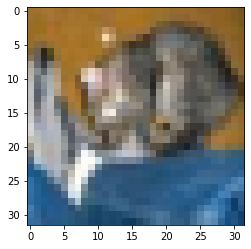

MedT_C(
  (global_branch): Encoder(
    (layers): ModuleList(
      (0): Conv2d(3, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): GatedAxialTransformerLayer(
        (conv_down): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (height_attention): AxialAttention(
          (values): Linear(in_features=16, out_features=16, bias=False)
          (keys): Linear(in_features=16, out_features=16, bias=False)
          (queries): Linear(in_features=16, out_features=16, bias=False)
          (fc_out): Linear(in_features=128, out_features=128, bias=True)
        )
        (width_attention): AxialAttention(
          (values): Linear(in_features=16, out_features=16, bias=False)
          (keys): Linear(in_features=16, out_features=16, bias=False)
          (queries): Linear(in_features=16, out_features=16, bias=False)
          (fc_out): Linear(in_features=128, out_featu

          Linear-557             [-1, 8, 8, 16]             256
          Linear-558             [-1, 8, 8, 16]             256
          Linear-559             [-1, 8, 8, 16]             256
          Linear-560            [-1, 8, 8, 128]          16,512
  AxialAttention-561            [-1, 128, 8, 8]               0
          Linear-562             [-1, 8, 8, 16]             256
          Linear-563             [-1, 8, 8, 16]             256
          Linear-564             [-1, 8, 8, 16]             256
          Linear-565            [-1, 8, 8, 128]          16,512
  AxialAttention-566            [-1, 128, 8, 8]               0
            ReLU-567            [-1, 128, 8, 8]               0
          Conv2d-568            [-1, 256, 8, 8]          33,024
     BatchNorm2d-569            [-1, 256, 8, 8]             512
            ReLU-570            [-1, 256, 8, 8]               0
GatedAxialTransformerLayer-571            [-1, 256, 8, 8]               0
          Conv2d-572          

In [3]:
%run MedT-C.ipynb

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


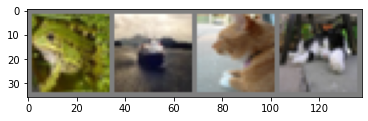

 frog  ship   cat   cat


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
# model = resnet18(3, 10)
model = MedT_C(
    img_dim=32,
    in_channels=3,
    patch_dim=8,
    num_classes=10,
    feature_dim=256
)
summary(model.cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 32, 32]          37,888
            Conv2d-2          [-1, 128, 32, 32]          32,896
       BatchNorm2d-3          [-1, 128, 32, 32]             256
              ReLU-4          [-1, 128, 32, 32]               0
            Linear-5            [-1, 32, 8, 16]             256
            Linear-6            [-1, 32, 8, 16]             256
            Linear-7            [-1, 32, 8, 16]             256
            Linear-8          [-1, 32, 32, 128]          16,512
    AxialAttention-9          [-1, 128, 32, 32]               0
           Linear-10            [-1, 32, 8, 16]             256
           Linear-11            [-1, 32, 8, 16]             256
           Linear-12            [-1, 32, 8, 16]             256
           Linear-13          [-1, 32, 32, 128]          16,512
   AxialAttention-14          [-1, 128,

          Conv2d-132            [-1, 128, 8, 8]          32,896
     BatchNorm2d-133            [-1, 128, 8, 8]             256
            ReLU-134            [-1, 128, 8, 8]               0
          Linear-135             [-1, 8, 8, 16]             256
          Linear-136             [-1, 8, 8, 16]             256
          Linear-137             [-1, 8, 8, 16]             256
          Linear-138            [-1, 8, 8, 128]          16,512
  AxialAttention-139            [-1, 128, 8, 8]               0
          Linear-140             [-1, 8, 8, 16]             256
          Linear-141             [-1, 8, 8, 16]             256
          Linear-142             [-1, 8, 8, 16]             256
          Linear-143            [-1, 8, 8, 128]          16,512
  AxialAttention-144            [-1, 128, 8, 8]               0
            ReLU-145            [-1, 128, 8, 8]               0
          Conv2d-146            [-1, 256, 8, 8]          33,024
     BatchNorm2d-147            [-1, 256

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # move inputs and labels to gpu
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.580
[1,  4000] loss: 2.226
[1,  6000] loss: 2.106
[1,  8000] loss: 2.077
[1, 10000] loss: 2.031
[1, 12000] loss: 1.979
[2,  2000] loss: 1.933
[2,  4000] loss: 1.905
[2,  6000] loss: 1.881
[2,  8000] loss: 1.879
[2, 10000] loss: 1.825
[2, 12000] loss: 1.829
Finished Training


In [9]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

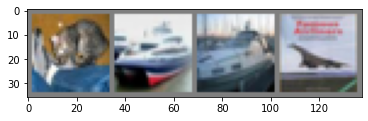

GroundTruth:    cat  ship  ship plane


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# images, labels = images.to(device), labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
trained_model = MedT_C(
    img_dim=32,
    in_channels=3,
    patch_dim=8,
    num_classes=10,
    feature_dim=256
)
trained_model.load_state_dict(torch.load(PATH))
trained_model.to(device)
next(trained_model.parameters()).is_cuda

True

In [12]:
images = images.to(device)
outputs = trained_model(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog truck  ship plane


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = trained_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 35 %
